In [1]:
%matplotlib inline
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

In [ ]:
orig_img_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\augument_data\\training_images'
img_width, img_height = 640., 480.
data_df = pd.read_csv(os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data', 'training.csv'))

In [ ]:
def vertical_flip(image_array: ndarray):
    return cv2.flip( img, 0)

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return cv2.flip(img, 1)

def hv_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return cv2.flip(img, -1)

In [ ]:
im = os.path.join(orig_img_dir, data_df.image_name[3])
img = cv2.imread(im)
img_h_flip = horizontal_flip(img).astype(np.uint8) # noisy('gauss',img).astype(np.uint8)
img_v_flip = vertical_flip(img).astype(np.uint8)
img_hv_flip = hv_flip(img).astype(np.uint8)
plt.figure(0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure(1)
plt.imshow(cv2.cvtColor(img_h_flip, cv2.COLOR_BGR2RGB))
plt.figure(2)
plt.imshow(cv2.cvtColor(img_v_flip, cv2.COLOR_BGR2RGB))
plt.figure(3)
plt.imshow(cv2.cvtColor(img_hv_flip, cv2.COLOR_BGR2RGB))

In [ ]:
df1 = pd.DataFrame({'image_name': ['aug_im'], 'x1': [1], 'x2': [2], 'y1': [3], 'y2' :[4]})
df2 = pd.DataFrame({'image_name': ['aug_im'], 'x1': [1], 'x2': [2], 'y1': [3], 'y2' :[4]})
df1 = df1.append(df2, ignore_index=True)
df1.head()

In [ ]:
res_df = data_df.copy()

# Horizontal Flip Loop
for i, im in enumerate(data_df.image_name):
    img = cv2.imread(os.path.join(orig_img_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[h]' + im
    img_h = horizontal_flip(img).astype(np.uint8)
    img_h_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [img_width - x2], 'x2': [img_width - x1], 'y1': [y1], 'y2' :[y2]})
    cv2.imwrite(os.path.join(orig_img_dir, aug_im), img_h)
    res_df = res_df.append(img_h_lab, ignore_index = True)
    

In [ ]:
res_df.head()
# res_df.tail()

In [ ]:
# Vertical Flip Loop
for i, im in enumerate(data_df.image_name):
    img = cv2.imread(os.path.join(orig_img_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[v]' + im
    img_v = vertical_flip(img).astype(np.uint8)
    img_v_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [x1], 'x2': [x2], 'y1':[img_height - y2], 'y2': [img_height - y1] })
    cv2.imwrite(os.path.join(orig_img_dir, aug_im), img_v)
    res_df = res_df.append(img_v_lab, ignore_index = True)

In [ ]:
# HorizontalVertical Flip Loop
for i, im in enumerate(data_df.image_name):
    img = cv2.imread(os.path.join(orig_img_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[h_v]' + im
    img_h_v = hv_flip(img).astype(np.uint8)
    img_h_v_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [img_width-x2], 'x2': [img_width-x1], 'y1':[img_height - y2], 'y2': [img_height - y1]})
    cv2.imwrite(os.path.join(orig_img_dir, aug_im), img_h_v)
    res_df = res_df.append(img_h_v_lab, ignore_index = True)

In [ ]:
#Gaussian Noise Loop
for i, im in enumerate(data_df.image_name):
    img = cv2.imread(os.path.join(orig_img_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[g]' + im
    img_g = noisy("gauss", img).astype(np.uint8)
    img_g_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [x1], 'x2': [x2], 'y1':[y1], 'y2': [y2]})
    cv2.imwrite(os.path.join(orig_img_dir, aug_im), img_g)
    res_df = res_df.append(img_g_lab, ignore_index = True)

In [ ]:
print(res_df.image_name.values.shape)
res_df.head()

In [ ]:
augment_path = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\augument_data'
res_df.to_csv(os.path.join(augment_path, 'augumented_data.csv'), index=False)

In [ ]:
# data_df = data_df.sample(frac=1).reset_index(drop=True)
res_df = res_df.sample(frac=1).reset_index(drop=True)

In [ ]:
res_df = pd.read_csv(os.path.join(augment_path, 'augumented_data.csv'))

In [ ]:
res_df = res_df.sample(frac=1).reset_index(drop=True)

In [ ]:
train_df = res_df.iloc[:68000]
val_df = res_df.iloc[68000:]

In [ ]:
train_df.to_csv(os.path.join(augment_path, 'augmented_train_data.csv'), index=False)
val_df.to_csv(os.path.join(augment_path, 'augmented_val_data.csv'), index=False)

In [ ]:
res_df.head()

In [ ]:
res_df.tail()

In [ ]:
train_df.head()

In [ ]:
train_df.tail()

In [ ]:
val_df.head()

In [ ]:
val_df.tail()

In [2]:
augment_path = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\augument_data'
train_df = pd.read_csv(os.path.join(augment_path, 'augmented_train_data.csv'))

In [3]:
# print(len(train_df.image_name.values))
img_width, img_height = (299, 299)

In [9]:
# for i in range(0,len(train_df.image_name.values), 1000):
#     j = i
#     l = []
#     for j in range(i, i+1000):
#         img = (cv2.imread(os.path.join(augment_path, 'training_images', train_df.iloc[j].image_name)) #/ 255.).astype(np.float32)
#         img = cv2.resize(img, (299, 299))
#         img = cv2.resize(img, (224, 224))
#         img = (img / 255.).astype(np.float32)
#         l.append(np.expand_dims(img, axis = 0))
#     l = np.array(l)
#     train_batch = np.vstack(l)
#     #     with open('x_train.pickle', 'wb') as handle:
#     #         pickle.dump(train_batch, handle, protocol=pickle.HIGHEST_PROTOCOL)
#     np.savez_compressed(os.path.join(augment_path, 'training_images_batches', str(i//1000)), train_batch)
    

SyntaxError: invalid syntax (<ipython-input-9-eeb412776e39>, line 6)

In [5]:
for i, im in enumerate(tqdm(train_df.image_name.values)):
    img = cv2.imread(os.path.join(augment_path, 'training_images', im))
    img = cv2.resize(img, (img_width, img_height))
    img = (img / 255.).astype(np.float32)
    

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500


In [ ]:
for i in range(0, len(train_df.image_name.values):
    print(i)
    j = i
    l = []
    for j in range(i, i+500):
        img = cv2.imread(os.path.join(augment_path, 'training_images', train_df.iloc[j].image_name))
        img = cv2.resize(img, (img_width, img_height))
#         img = (img / 255.).astype(np.float32)
#         l.append(np.expand_dims(img, axis = 0))
        cv2.imwrite(os.path.j)
    l = np.array(l)
    train_batch = np.vstack(l)
    np.save(os.path.join(augment_path, 'resized_training_images', str(i//500)), train_batch)

In [13]:
im = train_df.iloc[j].image_name
print(i9m)

TypeError: 'im' is an invalid keyword argument for this function

In [79]:
for i, im in enumerate(train_df.image_name):
    if im[:5] == '[h_v]':
        idx = i
        break

In [80]:
print(idx)

6


In [81]:
n = np.load(os.path.join(augment_path, 'training_images_batches', '0.npy'))

In [82]:
print(n.shape)

(1000, 299, 299, 3)


In [83]:
img = n[idx]

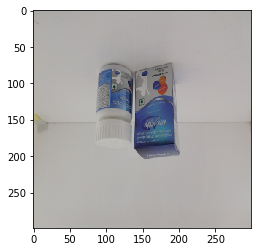

In [84]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


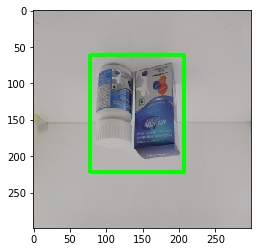

In [85]:
x1 = int(train_df.x1.iloc[idx]/2.1404)
x2 = int(train_df.x2.iloc[idx]/2.1404)
y1 = int(train_df.y1.iloc[idx]/1.61)
y2 = int(train_df.y2.iloc[idx]/1.61) #
cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[v]JPEG_20160621_121359_100048151077.png
[v]1474638122306DSC06451.png
[v]147772181322620161028_165831.png
[v]147771810022720161028_154644.png
JPEG_20161205_113835_1000778288816.png
JPEG_20161124_195158_1000240374506.png
[h_v]JPEG_20160709_164927_1000880862525.png
[h_v]JPEG_20161120_132406_1000121668323.png
[g]1474637416015DSC06767.png
[h_v]JPEG_20161203_132702_1000453790167.png


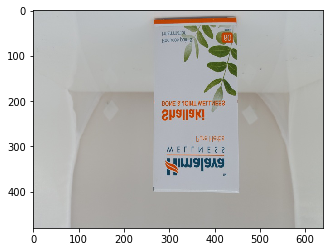

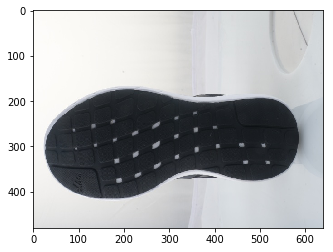

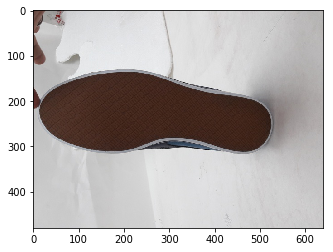

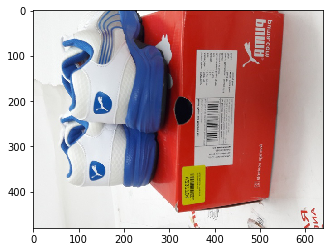

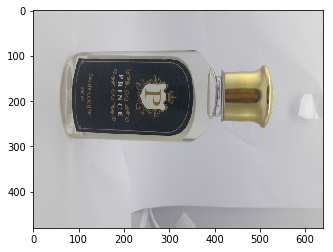

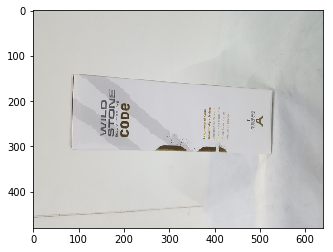

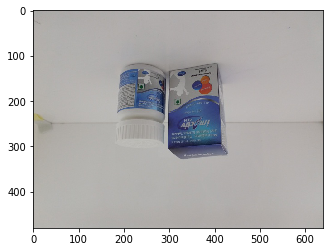

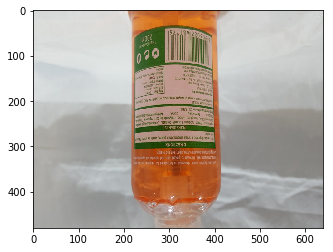

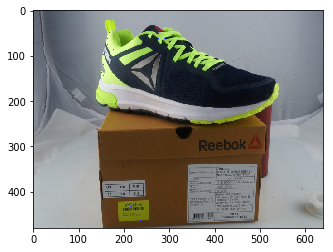

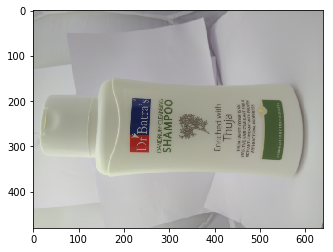

In [42]:
for i, im in enumerate(train_df.image_name.iloc[0:10]):
    print(im)
    plt.figure(i)
    img = cv2.imread(os.path.join(augment_path, 'training_images', im))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Test NPY

In [3]:
base_dir = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data'
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))

In [14]:
img_width, img_height = (299, 299)
for i in range(0, len(test_df.image_name.values), 1000):
    print(i)
    j = i
    l = []
    for j in range(i, i+1000):
        if(j >= 12815):
            break
        img = cv2.imread(os.path.join(base_dir, 'data', 'images', test_df.iloc[j].image_name))
        img = cv2.resize(img, (img_width, img_height))
        img = (img / 255.).astype(np.float32)
        l.append(np.expand_dims(img, axis = 0))
    l = np.array(l)
    test_batch = np.vstack(l)
    np.save(os.path.join(augment_path, 'test_images_batches', str(i//1000)), test_batch)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
